前言

       我们之前写过一篇文章是关于折线图的可视化《从零开始学Python【14】—matplotlib(折线图)》，一般来说，折线图表达的思想是研究某个时间序列的趋势。往往一条折线图可以根据某个分组变量进行拆分，比如今年的销售额可以拆分成各个事业线的贡献；流量可以拆分为各个渠道；物流总量可以拆分为公路运输、铁路运输、海运和空运。按照这个思路可以将一条折线图拆分成多条折线图，直观的发现各个折线图的趋势，但遗憾的是不能得知总量的趋势。为了解决这个问题，我们可以借助matplotlib中的stackplot函数绘制面积图来直观表达分组趋势和总量趋势。

stackplot函数语法及参数含义

stackplot(x,*args,**kargs)

x指定面积图的x轴数据
*args为可变参数，可以接受任意多的y轴数据，即各个拆分的数据对象
**kargs为关键字参数，可以通过传递其他参数来修饰面积图，如标签、颜色
可用的关键字参数：

labels:以列表的形式传递每一块面积图包含的标签，通过图例展现

colors:设置不同的颜色填充面积图



案例分享

       以我国2017年的物流运输量为例，来对比绘制折线图和面积图。这里将物流运输量拆分成公路运输、铁路运输和水路运输，绘图的对比代码见下方所示：

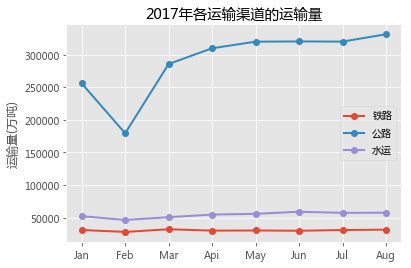

In [2]:
# ========== Python3 + Jupyter ========== #
# 导入第三方模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置图形的显示风格
plt.style.use('ggplot')
# 设置中文和负号正常显示
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
transport = pd.read_excel('transport.xls')
# 窥探数据框的前5行
transport.head()

# 折线图的x变量值，即Jan（一月份）到Aug（八月份）8个值
N = np.arange(transport.shape[1]-1)

# 绘制拆分的折线图 
labels = transport.Index
channel = transport.columns[1:]

for i in range(transport.shape[0]):
    plt.plot(N, # x坐标
             transport.loc[i,'Jan':'Aug'], # y坐标
             label = labels[i], # 添加标签
             marker = 'o', # 给折线图添加圆形点
             linewidth = 2 # 设置线的宽度
            )

# 添加标题和坐标轴标签
plt.title('2017年各运输渠道的运输量')
plt.ylabel('运输量(万吨)')
# 修改x轴的刻度标签
plt.xticks(N,channel)

# 剔除图框上边界和右边界的刻度
plt.tick_params(top = 'off', right = 'off')

# 显示图例（即显示label的效果）   
plt.legend(loc = 'best')   
# 显示图形
plt.show()

这就是绘制分组的折线图思想，虽然折线图能够反映各个渠道的运输量随月份的波动趋势，但无法观察到1月份到8月份的各自总量。接下来我们看看面积图的展现。

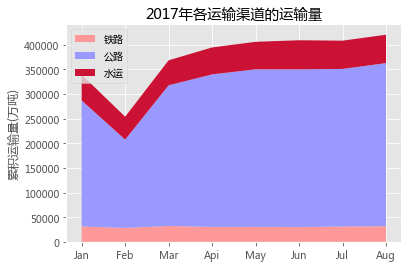

In [3]:
x = N
# 将铁路运输、公路运输和水路运输各月的值提取出来，存储到y1~y3
# 千万千万记得，提取出数据框的一列时，需要将序列的数据类型进行强制转换，否则会报错
y1 = transport.loc[0,'Jan':'Aug'].astype('int')
y2 = transport.loc[1,'Jan':'Aug'].astype('int')
y3 = transport.loc[2,'Jan':'Aug'].astype('int')

# 定义各区块面积的含义
colors = ['#ff9999','#9999ff','#cc1234']

# 绘制面积图
plt.stackplot(x, # x轴
              y1,y2,y3, # 可变参数，接受多个y
              labels = labels, # 定义各区块面积的含义
              colors = colors # 设置各区块的填充色
             )

# 添加标题和坐标轴标签
plt.title('2017年各运输渠道的运输量')
plt.ylabel('累积运输量(万吨)')

# 修改x轴的刻度
plt.xticks(N,channel)

# 剔除图框上边界和右边界的刻度
plt.tick_params(top = 'off', right = 'off')

# 显示图例（即显示labels的效果）  
plt.legend(loc = 'upper left')
# 显示图形
plt.show()

一个stackplot函数就能解决问题，而且具有很强的定制化。从上面的面积图就可以清晰的发现两个方面的信息，一个是各渠道运输量的趋势，另一个是则可以看见各月份的总量趋势。所以，我们在可视化的过程中要尽可能的为阅读者输出简单而信息量丰富的图形。

结语

       OK，关于面积图的绘制，我们就分享到这里，但要记得，什么场景下使用面积图会更好。